In [1]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r "/content/drive/MyDrive/CAFD_YOLO" "/content/CAFD_YOLO"

Mounted at /content/drive


In [2]:
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.6 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import numpy as np
import random
import torch
import os

def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(150102)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
class Config:
    IMG_SIZE = 640
    BATCH_SIZE = 32
    EPOCHS = 20
    LEARNING_RATE = 5e-4
    NUM_CLASSES = 42
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

    CLASSES = [
        "achichuk", "airan-katyk", "asip", "bauyrsak", "beshbarmak-w-kazy",
        "beshbarmak-wo-kazy", "chak-chak", "cheburek", "doner-lavash", "doner-nan",
        "hvorost", "irimshik", "kattama-nan", "kazy-karta", "kurt", "kuyrdak",
        "kymyz-kymyran", "lagman-fried", "lagman-w-soup", "lagman-wo-soup", "manty",
        "naryn", "nauryz-kozhe", "orama", "plov", "samsa", "shashlyk-chicken",
        "shashlyk-chicken-v", "shashlyk-kuskovoi", "shashlyk-kuskovoi-v",
        "shashlyk-minced-meat", "sheep-head", "shelpek", "shorpa", "soup-plain",
        "sushki", "suzbe", "taba-nan", "talkan-zhent", "tushpara-fried",
        "tushpara-w-soup", "tushpara-wo-soup"
    ]

    TRAIN_DATA = '/content/CAFD_YOLO/train'
    VALIDATION_DATA = '/content/CAFD_YOLO/val'
    TEST_DATA = '/content/CAFD_YOLO/test'

cfg = Config()
yaml_path = '/content/drive/MyDrive/BentoVision/cafd.yaml'
yaml_content = f"""
train: {cfg.TRAIN_DATA}
val: {cfg.VALIDATION_DATA}
nc: {cfg.NUM_CLASSES}
names: {cfg.CLASSES}
"""

with open(yaml_path, 'w') as file:
    file.write(yaml_content)

In [5]:
model = YOLO('yolov8n.pt')

model.train(
    data = yaml_path,
    epochs = cfg.EPOCHS,
    imgsz = cfg.IMG_SIZE,
    batch = cfg.BATCH_SIZE,
    lr0 = cfg.LEARNING_RATE,
    device = cfg.DEVICE,
    mosaic = True,
    amp = False,
    workers = 4,
    close_mosaic = True
)

model.export(format = 'onnx', dynamic = True)

Ultralytics 8.3.211 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=True, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/BentoVision/cafd.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=True, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

'/content/runs/detect/train/weights/best.onnx'

In [6]:
import pandas as pd

results_csv_path = "runs/detect/train/results.csv"
results = pd.read_csv(results_csv_path)
print(results.head(45))

    epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1   257.434         0.19520         3.61629         0.97874   
1       2   493.659         0.09474         2.08700         0.89617   
2       3   724.425         0.08660         1.59246         0.88607   
3       4   955.331         0.08193         1.33575         0.88326   
4       5  1189.870         0.07593         1.18518         0.88196   
5       6  1425.410         0.07159         1.08982         0.87909   
6       7  1661.260         0.06770         1.00852         0.87828   
7       8  1896.900         0.06575         0.94882         0.87744   
8       9  2133.170         0.06259         0.90446         0.87646   
9      10  2368.560         0.06014         0.85426         0.87548   
10     11  2605.820         0.05860         0.83048         0.87647   
11     12  2839.990         0.05488         0.78124         0.87367   
12     13  3073.930         0.05333         0.75973         0.87370   
13    

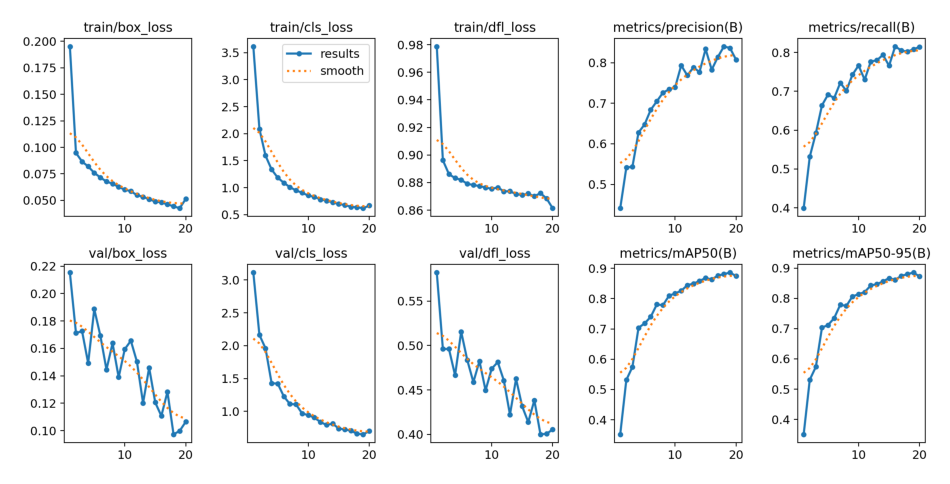

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("runs/detect/train/results.png")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /content/CAFD_YOLO/test/images/14334.jpg: 480x640 1 kattama-nan, 37.5ms
Speed: 2.4ms preprocess, 37.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


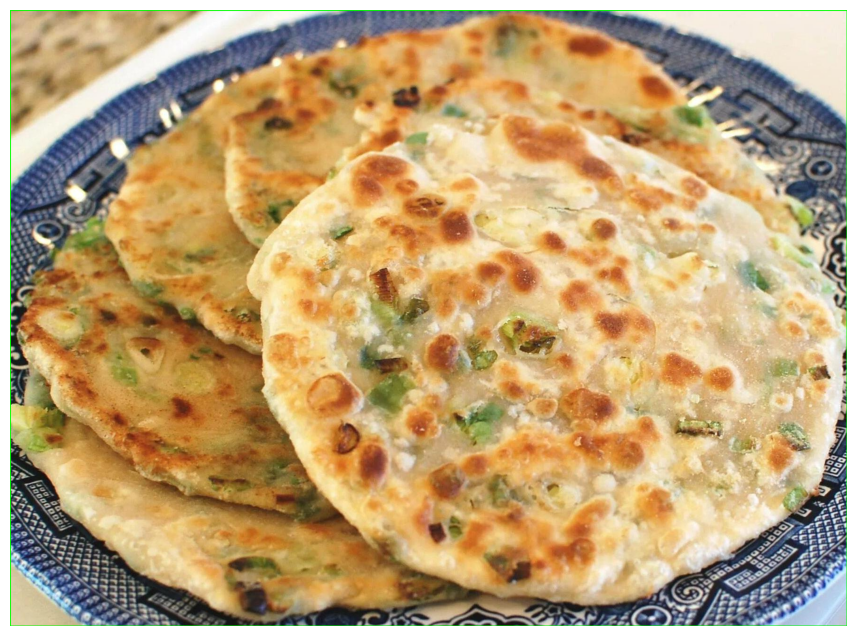


Detailed Detections:
Detection 1:
  Class: kattama-nan
  Top Confidence: 0.95
  Bounding Box: (np.float32(0.06253366), np.float32(0.0), np.float32(1777.0), np.float32(1309.0))
  Top 3 Confidence Scores: 0.95
------------------------------


In [ ]:
import cv2
import matplotlib.pyplot as plt

model = YOLO('/content/runs/detect/train/weights/best.pt')

# Perform inference on the test image
TEST_IMAGE = '/content/CAFD_YOLO/test/images/14334.jpg'
results = model.predict(
    source=TEST_IMAGE,
    imgsz=Config.IMG_SIZE,
    conf=0.17  # Confidence threshold
)

# Load the image for visualization
image = cv2.imread(TEST_IMAGE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# To store detailed information about detections
detection_details = []

# Iterate over detections
for result in results[0].boxes.data:
    # Extract bounding box coordinates, confidence score, and class ID
    x1, y1, x2, y2, confidence, class_id = result.cpu().numpy()

    # Draw the bounding box with top confidence score
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color=(0, 255, 0), thickness=2)
    label = f"{Config.CLASSES[int(class_id)]}: {confidence:.2f}"
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), thickness=1)

    # Save details for printing below
    detection_details.append({
        "class": Config.CLASSES[int(class_id)],
        "top_confidence": confidence,
        "bbox": (x1, y1, x2, y2)
    })

# Display the image with bounding boxes and labels
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

# Print detailed top 3 confidence scores for each bounding box
print("\nDetailed Detections:")
for idx, det in enumerate(detection_details, start=1):
    print(f"Detection {idx}:")
    print(f"  Class: {det['class']}")
    print(f"  Top Confidence: {det['top_confidence']:.2f}")
    print(f"  Bounding Box: {det['bbox']}")
    # Retrieve the top 3 scores for detailed output
    confidence_scores = results[0].boxes.conf.cpu().numpy()
    top_3_scores = sorted(confidence_scores, reverse=True)[:3]
    print(f"  Top 3 Confidence Scores: {', '.join([f'{score:.2f}' for score in top_3_scores])}")
    print("-" * 30)